# IMPORT LIBRARIES

In [1]:
#import libraries
#libraries are imported as global
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# GATHER DATA

In [2]:
#load the training dataset
train=pd.read_csv('train.csv')

#load the testing dataset
test=pd.read_csv('test.csv')

In [3]:
#Get an overview of the training dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Get the dimensions of the training dataset
train.shape 

(891, 12)

In [5]:
#Get an overview of the column names for the training dataset
train.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#Get the number of null values in the training data
#Here we have around 177 missing values for Age and 687 missing values for Cabin
train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Total number of male and female in the training dataset
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
#Total number of Pclass in the training dataset
#with Pclass 3 being the highest and the most common.
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

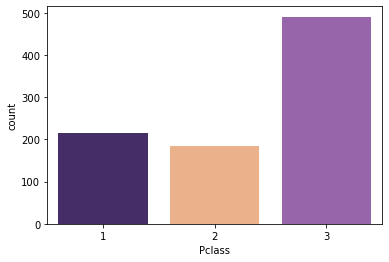

In [9]:
#Visualization of Pclass
sns.countplot(x='Pclass', data=train, palette=['#432371',"#FAAE7B","#9b59b6"])

In [10]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

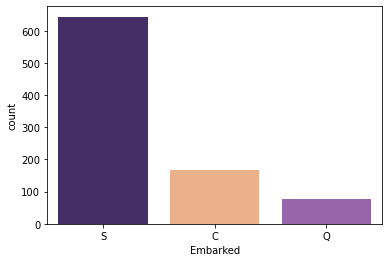

In [11]:
#Visualization of Embarked
sns.countplot(x='Embarked', data=train, palette=['#432371',"#FAAE7B","#9b59b6"])

In [12]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

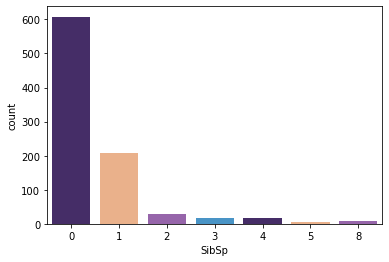

In [13]:
#Visualization of SibSp
sns.countplot(x='SibSp', data=train, palette=['#432371',"#FAAE7B", "#9b59b6", "#3498db"])

<AxesSubplot:xlabel='Sex'>

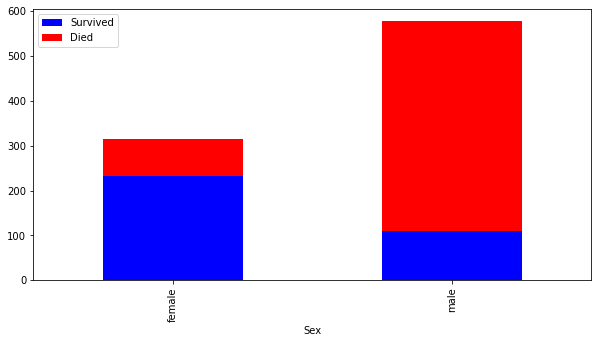

In [14]:
#Visual comparison of female and male survivors
train['Died'] = 1 - train['Survived']
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 5), stacked=True, color = ('blue','red'))#modifies the bargraph

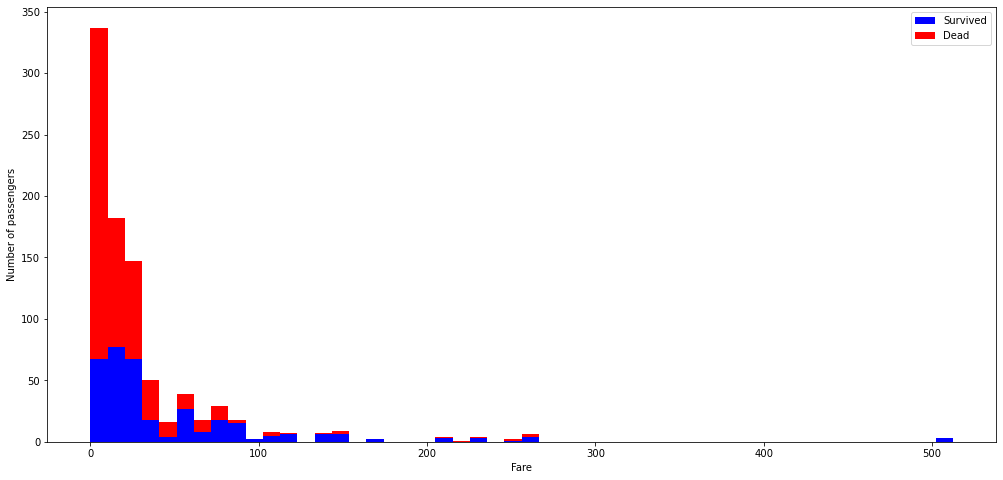

In [15]:
#Visual comparison of the passengers who survived or died. Here the lower values of Fare correlates 
#with the higher number of deaths.
figure = plt.figure(figsize=(17, 8))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], 
stacked=True, bins = 50, label = ['Survived','Dead'], color = ('blue','red'))
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

In [16]:
#The titles for the names aboard the ship in the dataset.
titles = set()
for name in train['Name']:titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Ms', 'Dr', 'Major', 'Rev', 'Lady', 'the Countess', 'Master', 'Mlle', 'Mrs', 'Col', 'Mme', 'Sir', 'Capt', 'Mr', 'Jonkheer', 'Miss', 'Don'}


In [17]:
#Contain all the titles in a single variable
Title_Dictionary = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty","Don": "Royalty","Sir" : "Royalty","Dr": "Officer","Rev": "Officer","the Countess":"Royalty","Mme": "Mrs","Mlle": "Miss","Ms": "Mrs","Mr" : "Mr","Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

In [18]:
#Here we create another column in the dataset as title containing the prefixes in the names of the passengers
#periods and commas are also removed.
train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train['Title'] = train.Title.map(Title_Dictionary)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


# CLEAN THE DATASET FOR TRAINING

In [19]:
#First step of cleaning the dataset is dropping unnecessary columns and data. These are outliers
#These columns do not contribute to the probability of their survival.
#Died is a column created earlier just for visualization to represent 0 values in survived.
df1=train.drop(['Name','Ticket','Cabin','PassengerId','Died'], axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [20]:
#.value_counts shows the total number of categorical features for the passengers.
train.Title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [21]:
#Conversion of categorical features to numerical values
df1.Sex=df1.Sex.map({'female':0, 'male':1})#changes female column values to 0, and male to 1
df1.Embarked=df1.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
df1.Title=df1.Title.map({'Mr':0, 'Miss':1, 'Mrs':2,'Master':3,'Officer':4,'Royalty':5})
df1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,2
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,2
4,0,3,1,35.0,0,0,8.0500,0,0
5,0,3,1,NaN,0,0,8.4583,2,0
6,0,1,1,54.0,0,0,51.8625,0,0
7,0,3,1,2.0,3,1,21.0750,0,3
8,1,3,0,27.0,0,2,11.1333,0,2
9,1,2,0,14.0,1,0,30.0708,1,2


In [22]:
#Getting the median age for the males and females
median_age_men=df1[df1['Sex']==1]['Age'].median()
median_age_women=df1[df1['Sex']==0]['Age'].median()

In [23]:
#null values are filled in 'Age' with respective median age
df1.loc[(df1.Age.isnull()) & (df1['Sex']==0),'Age']=median_age_women
df1.loc[(df1.Age.isnull()) & (df1['Sex']==1),'Age']=median_age_men

In [24]:
#checking for null values
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [25]:
#dropping rows with null value
df1.dropna(inplace=True)

In [26]:
#Data is cleaned to have no null value
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [27]:
#cleaned dataset
#Once we clean the dataset for training, we can then see an overview of the dataset 
#by using .head() appended to the dataset variable. The value inside the parenthesis() pertains to the number of rows.
df1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,2
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,2
4,0,3,1,35.0,0,0,8.0500,0,0
5,0,3,1,29.0,0,0,8.4583,2,0
6,0,1,1,54.0,0,0,51.8625,0,0
7,0,3,1,2.0,3,1,21.0750,0,3
8,1,3,0,27.0,0,2,11.1333,0,2
9,1,2,0,14.0,1,0,30.0708,1,2


In [28]:
df1.Age = (df1.Age-min(df1.Age))/(max(df1.Age)-min(df1.Age))
df1.Fare = (df1.Fare-min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))

In [29]:
#Show the total number of missing values per column
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 69.5+ KB


# CLEANING DATASET FOR TESTING

In [30]:
#test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
titles = set()
for name in test['Name']:titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Ms', 'Dr', 'Rev', 'Master', 'Col', 'Mrs', 'Dona', 'Miss', 'Mr'}


In [32]:
#Here we create another column in the testing dataset as title containing the prefixes in the names of the passengers
#periods and commas are also removed.
test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test['Title'] = test.Title.map(Title_Dictionary)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [33]:
#dropping unwanted columns for the testing dataset
df2=test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [34]:
#Converting categorical feature to numeric in the testing dataset
df2.Sex=df2.Sex.map({'female':0, 'male':1})
df2.Embarked=df2.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'nan'})
df2.Title=df2.Title.map({'Mr':0, 'Miss':1, 'Mrs':2,'Master':3,'Officer':4,'Royalty':5})
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,2,0.0
1,3,0,47.0,1,0,7.0000,0,2.0
2,2,1,62.0,0,0,9.6875,2,0.0
3,3,1,27.0,0,0,8.6625,0,0.0
4,3,0,22.0,1,1,12.2875,0,2.0


In [35]:
#Checking for null values
df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        1
dtype: int64

In [36]:
#median age of each sex in the testing data
median_age_men2=df2[df2['Sex']==1]['Age'].median()
median_age_women2=df2[df2['Sex']==0]['Age'].median()

In [37]:
#null values are replaced with the respective median age for the testing data
df2.loc[(df2.Age.isnull()) & (df2['Sex']==0),'Age']=median_age_women2
df2.loc[(df2.Age.isnull()) & (df2['Sex']==1),'Age']=median_age_men2

In [38]:
#filling null values with median fare
df2['Fare']=df2['Fare'].fillna(df2['Fare'].median())

In [39]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       1
dtype: int64

In [40]:
#Display the null values for the title column.
df2[df2.Title.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
414,1,0,39.0,0,0,108.9,1,NaN


In [41]:
df2=df2.fillna(2)

In [42]:
#Null values from the data are cleaned
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [43]:
#Once we clean the dataset for testing, we can then see an overview of the dataset 
#by using .head() appended to the dataset variable. The value inside the parenthesis() pertains to the number of rows.
df2.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,2,0.0
1,3,0,47.0,1,0,7.0000,0,2.0
2,2,1,62.0,0,0,9.6875,2,0.0
3,3,1,27.0,0,0,8.6625,0,0.0
4,3,0,22.0,1,1,12.2875,0,2.0
5,3,1,14.0,0,0,9.2250,0,0.0
6,3,0,30.0,0,0,7.6292,2,1.0
7,2,1,26.0,1,1,29.0000,0,0.0
8,3,0,18.0,0,0,7.2292,1,2.0
9,3,1,21.0,2,0,24.1500,0,0.0


In [44]:
#scaling the features
df2.Age = (df2.Age-min(df2.Age))/(max(df2.Age)-min(df2.Age))
df2.Fare = (df2.Fare-min(df2.Fare))/(max(df2.Fare)-min(df2.Fare))

In [77]:
#dataset overview after cleaning
df2.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,0.452723,0,0,0.015282,2,0.0
1,3,0,0.617566,1,0,0.013663,0,2.0
2,2,1,0.815377,0,0,0.018909,2,0.0
3,3,1,0.353818,0,0,0.016908,0,0.0
4,3,0,0.287881,1,1,0.023984,0,2.0
5,3,1,0.182382,0,0,0.018006,0,0.0
6,3,0,0.393380,0,0,0.014891,2,1.0
7,2,1,0.340630,1,1,0.056604,0,0.0
8,3,0,0.235131,0,0,0.014110,1,2.0
9,3,1,0.274693,2,0,0.047138,0,0.0


# CHOOSING AND TRAINING THE MODELS

In [46]:
#Split the training and testing data with test size at 20%
X_train, X_test, y_train, y_test = train_test_split(df1.drop(['Survived'], axis=1),df1.Survived,test_size= 0.2, 
random_state=0, stratify=df1.Survived) #stratify is used to make the Survived column from the training dataset as the output.

In [47]:
#Logistic regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)

In [48]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors = 5)
clf2.fit(X_train, y_train)
Y_pred2 = clf2.predict(X_test)

In [49]:
#Convert the data to fit in the Keras model
X_train2 = np.asarray(X_train).astype(np.float32)
y_train2 = np.asarray(y_train).astype(np.float32)
X_test2 = np.asarray(X_test).astype(np.float32)

In [50]:
#define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu')) #we use input shape as (8,) because there are 8 features that we need
model.add(Dense(8, activation='relu')) #this is the hidden layer
model.add(Dense(1, activation='sigmoid')) #this is the output layer (1 output for classification)

In [51]:
#compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#from our class about neural networks, you can use different 

In [52]:
#fit the keras model on the dataset
model.fit(X_train2, y_train2, epochs=150, batch_size=10)

Epoch 1/150
72/72 [==============================] - 1s 1ms/step - loss: 0.6337 - accuracy: 0.7046
Epoch 2/150
72/72 [==============================] - 0s 1ms/step - loss: 0.5753 - accuracy: 0.6948
Epoch 3/150
72/72 [==============================] - 0s 1ms/step - loss: 0.5470 - accuracy: 0.7159
Epoch 4/150
72/72 [==============================] - 0s 1ms/step - loss: 0.5258 - accuracy: 0.7750
Epoch 5/150
72/72 [==============================] - 0s 1ms/step - loss: 0.5113 - accuracy: 0.7904
Epoch 6/150
72/72 [==============================] - 0s 1ms/step - loss: 0.5005 - accuracy: 0.7918
Epoch 7/150
72/72 [==============================] - 0s 1ms/step - loss: 0.4920 - accuracy: 0.7947
Epoch 8/150
72/72 [==============================] - 0s 1ms/step - loss: 0.4861 - accuracy: 0.7975
Epoch 9/150
72/72 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.7918
Epoch 10/150
72/72 [==============================] - 0s 1ms/step - loss: 0.4765 - accuracy: 0.7918
Epoch 11/

72/72 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8242
Epoch 84/150
72/72 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8200
Epoch 85/150
72/72 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8284
Epoch 86/150
72/72 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8270
Epoch 87/150
72/72 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8298
Epoch 88/150
72/72 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8284
Epoch 89/150
72/72 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8270
Epoch 90/150
72/72 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.8270
Epoch 91/150
72/72 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8284
Epoch 92/150
72/72 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8228
Epoch 93/150


In [53]:
Y_pred3 = model.predict(X_test2)

6/6 [==============================] - 0s 1ms/step


# EVALUATING THE MODELS

In [54]:
#Accuracy score for Logistic Regression
accuracy_score(y_test, Y_pred)

0.8426966292134831

In [55]:
#Accuracy score for KNN
accuracy_score(y_test, Y_pred2)

0.8651685393258427

In [56]:
#Accuracy score for keras model
_, accuracy = model.evaluate(X_train2, y_train2)
print('Accuracy: %.2f' % (accuracy*100))

23/23 [==============================] - 0s 1ms/step - loss: 0.3877 - accuracy: 0.8326
Accuracy: 83.26


In [57]:
cm=confusion_matrix(y_test, Y_pred)
cm
#We got 98 true positives and 52 true negatives

array([[98, 12],
       [16, 52]], dtype=int64)

<AxesSubplot:>

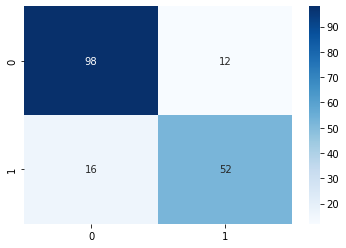

In [58]:
#visualization of confusion matrix for LogisticRegression
sns.heatmap(cm,annot=True, cmap = 'Blues')

In [59]:
cm2=confusion_matrix(y_test, Y_pred2)
cm2
#We got 99 true positives and 55 true negatives

array([[99, 11],
       [13, 55]], dtype=int64)

<AxesSubplot:>

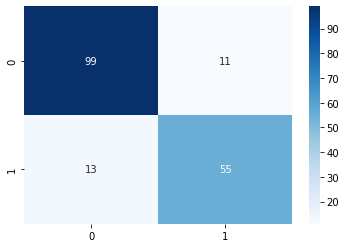

In [60]:
#visualization of confusion matrix for KNN
sns.heatmap(cm2,annot=True, cmap = 'Blues')

# PREDICTION

In [61]:
#Prediction using LogisticRegression Model
pred = clf.predict(df2)

In [62]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [63]:
#Prediction using KNN Model
pred2 = clf2.predict(df2)

In [64]:
pred2

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [65]:
#Prediction using Keras Model
pred3 = (model.predict(df2) > 0.5).astype(int).flatten()#We use flatten to convert the prediction values into a 1D array.

14/14 [==============================] - 0s 769us/step


In [66]:
pred3

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [67]:
#saves the prediction in an output.csv as the answer for the test.csv
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": pred})
submission.to_csv('LogisticRegression.csv', index=False)

In [68]:
#saves the prediction in an output.csv as the answer for the test.csv
submission2 = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": pred2})
submission2.to_csv('KNN.csv', index=False)

In [69]:
#saves the prediction in an output.csv as the answer for the test.csv
submission3 = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": pred3})
submission3.to_csv('Keras.csv', index=False)

In [70]:
pred_df = pd.read_csv('LogisticRegression.csv')

In [71]:
pred_df2 = pd.read_csv('KNN.csv')

In [72]:
pred_df3 = pd.read_csv('Keras.csv')

<AxesSubplot:xlabel='Survived', ylabel='count'>

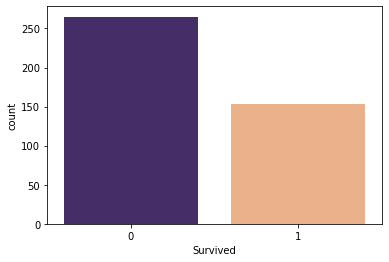

In [73]:
#visualizing predicted values for Logistic Regression
sns.countplot(x='Survived', data=pred_df, palette=['#432371',"#FAAE7B"])

<AxesSubplot:xlabel='Survived', ylabel='count'>

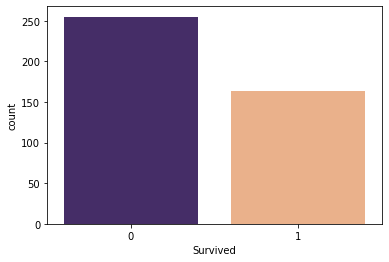

In [74]:
#visualizing predicted values for the KNN model
sns.countplot(x='Survived', data=pred_df2, palette=['#432371',"#FAAE7B"])

<AxesSubplot:xlabel='Survived', ylabel='count'>

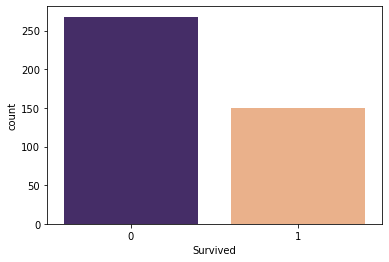

In [75]:
#visualizing predicted values for the Keras model
sns.countplot(x='Survived', data=pred_df3, palette=['#432371',"#FAAE7B"])

# COMPARISON, ANALYSIS AND CONCLUSION

In [76]:
#After cleaning the datasets by dropping the outliers, the two machine learning algorithms that are used are Logistic Regression
#and KNN under supervised machine learning. The Neural Network model used is the Keras sequential model.
#The 2 machine learning algorithms are quite close in terms of their accuracy. Between the two machine learning models 
#Logistic Regression and the KNN model, the Logistic Regression model got around 84.27% after training with the dataset and KNN got
#86.52%. Meanwhile the Keras model got around 83.97% with 150 epochs set.